In [6]:
import pandas as pd
import numpy as np

import geopandas as gpd

##### **입지 점수 체계**
1. 입지 반경 5km 버퍼 생성
2. 버퍼 내
    - 도로 격자 포함 개수 count
    - 입지 격자(point)에 정류장이 있는지
    - 반경 5km내 인구(수요)정보 계산 ←가중치: 직선거리

In [9]:
hos_point = gpd.read_file('grid_datas/hos_points.shp')
hos_point.head()

,HOS_NM,geometry
0,포항성모병원,"POLYGON ((129.33091 36.01187, 129.33112 36.020..."
1,경상북도포항의료원,"POLYGON ((129.35352 36.02955, 129.35373 36.038..."
2,동국대학교의과대학경주병원,"POLYGON ((129.19435 35.85161, 129.19454 35.860..."
3,의료법인안동병원,"POLYGON ((128.69543 36.54275, 128.69556 36.551..."
4,상주적십자병원,"POLYGON ((128.14691 36.41176, 128.14698 36.420..."


- 버퍼 생성

<Axes: >

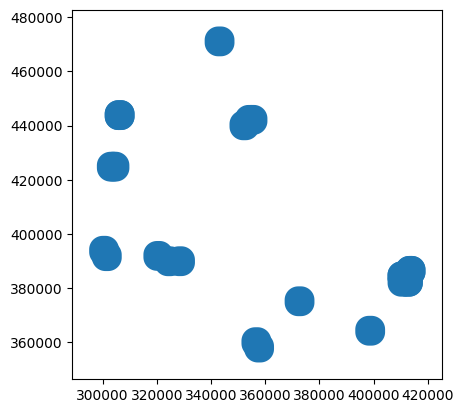

In [19]:
hos_buffer = hos_point.to_crs(epsg=5186).geometry.buffer(5*1000) # 반경 5,000m 버퍼
hos_buffer.plot()

In [24]:
data_dir = './rawdatas/'
grid = gpd.read_file(data_dir + 'gb_grid/gb_grid.shp', encoding='utf-8')

<Axes: >

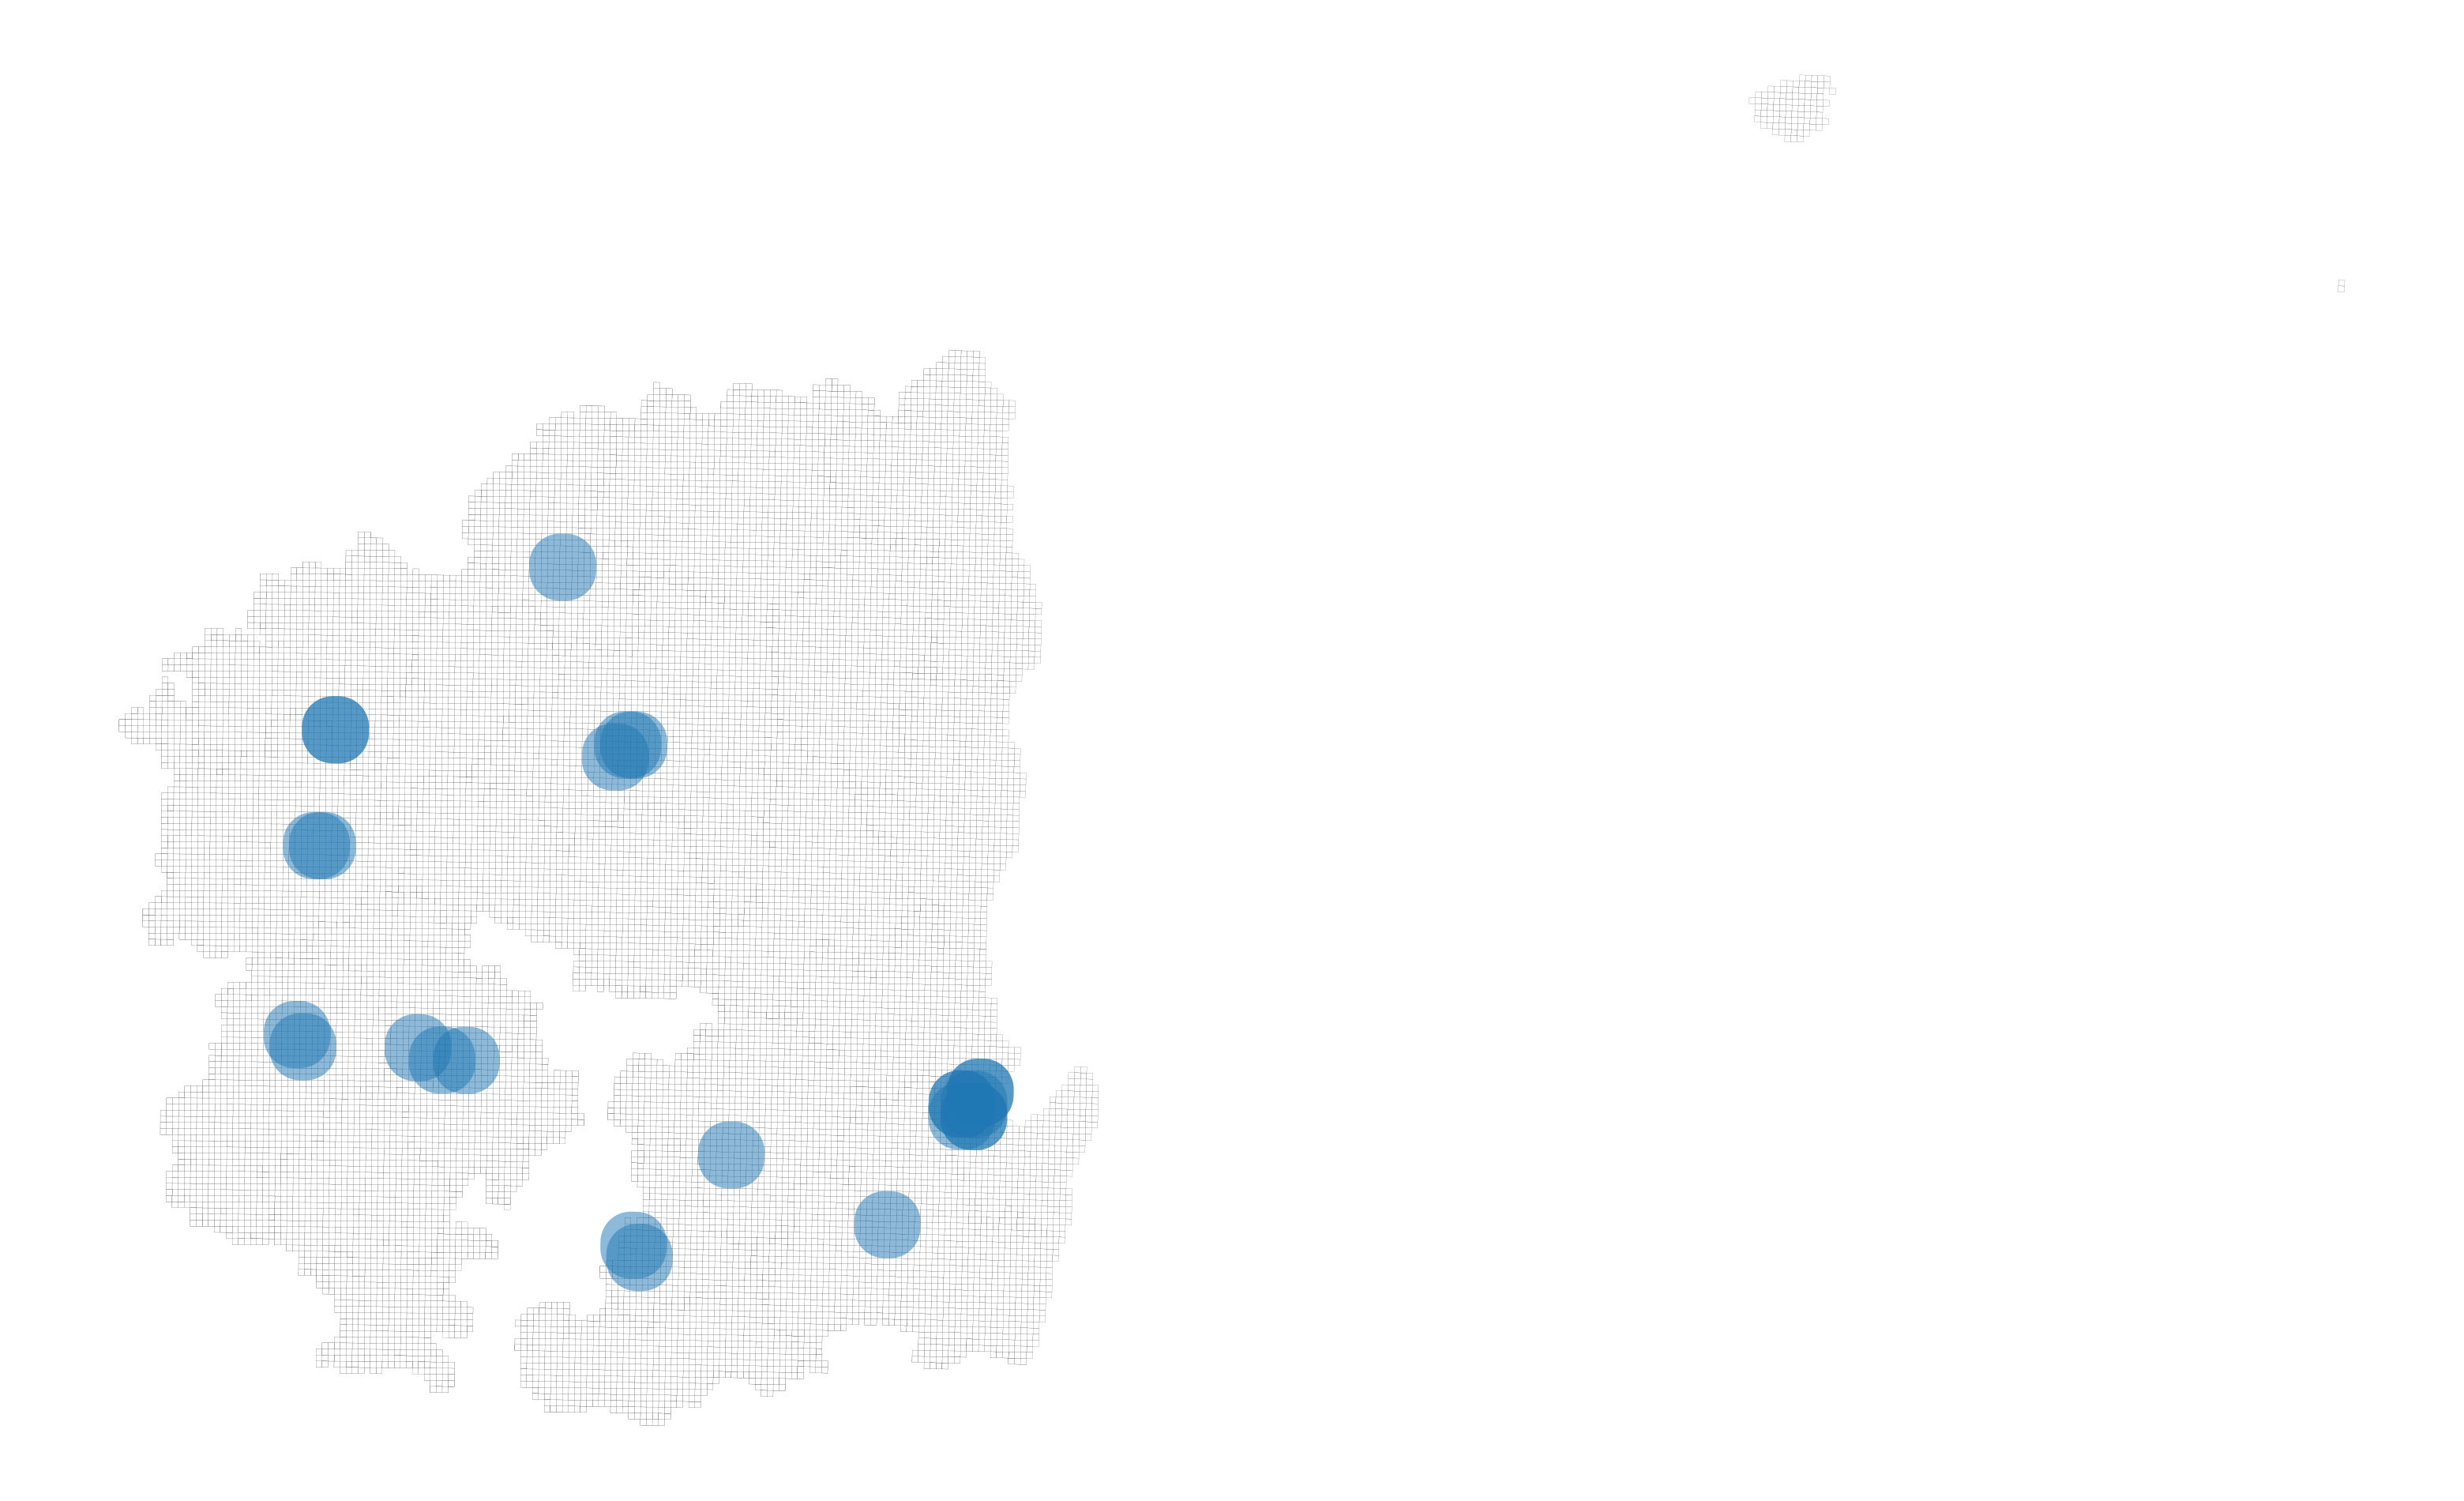

In [28]:
ax = grid.plot(figsize=(40, 40), color='white', linewidth=0.1, edgecolor='black')
ax.axis('off')

hos_buffer.to_crs('epsg:4326').plot(ax=ax, alpha=0.5)

- 도로 격자 로드

<Axes: >

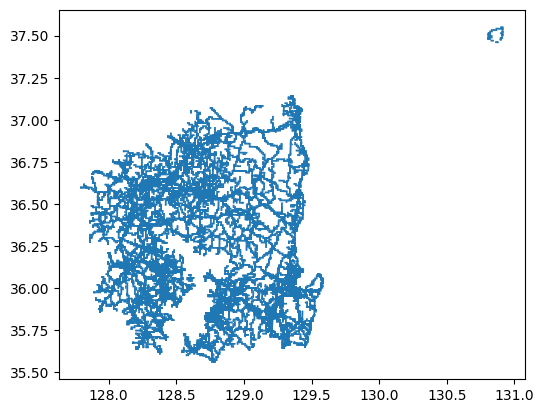

In [25]:
link = gpd.read_file('grid_datas/links.shp')
link.plot()

- 정류장 격자 로드

<Axes: >

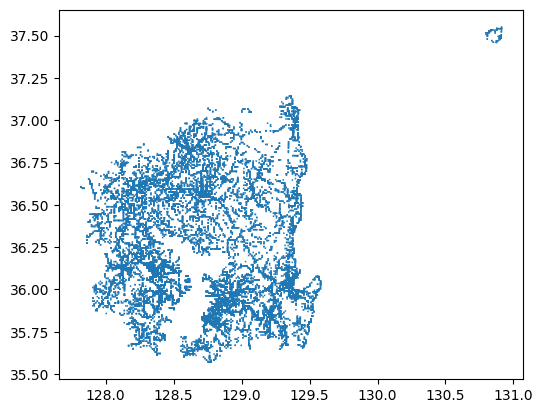

In [26]:
bstop = gpd.read_file('grid_datas/bstops.shp')
bstop.plot()

- 행정동 인구 로드

In [32]:
pop = pd.read_csv('gb_pops_3cat.csv')

# 인구 구성별 가중치 적용해서 인구 집계
pop['adj_total'] = (pop['0-14']*1.25) + pop['15-64'] + (pop['65-']*1.5)
pop = pop[['temp', 'adj_total']]

pop.head()

,temp,adj_total
0,포항시남구 구룡포읍,8442.25
1,포항시남구 연일읍,32535.00
2,포항시남구 오천읍,63708.00
3,포항시남구 대송면,3911.50
4,포항시남구 동해면,11115.25


In [35]:
# 읍면동 위치정보에 집계인구를 추가
umd = gpd.read_file(data_dir+'gb_geos.geojson')
umd_pops = pd.merge(umd, pop, on='temp')
umd_pops.head(1)

,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,temp,sggnm,adm_cd8,geometry,adj_total
0,경상북도 포항시남구 구룡포읍,3701111,4711125000,47111,47,경상북도,포항시남구 구룡포읍,포항시남구,37011110,"MULTIPOLYGON (((129.53015 35.93495, 129.52901 ...",8442.25


- **기존 종합병원 입지 점수 계산**